In [32]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
import warnings
warnings.filterwarnings("ignore") 
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [33]:
# Importing and Exploration of the dataset
df = pd.read_csv("C:/Users/Rezaei/Desktop/loans.csv", index_col = 'client_id')
# showing the first 5 rows of the dataset
df.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
client_id,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13


In [34]:
# To check the Dimensions of the dataset
df.shape

(443, 7)

In [35]:
# checking the count and name of the data
df.columns

Index(['loan_type', 'loan_amount', 'repaid', 'loan_id', 'loan_start',
       'loan_end', 'rate'],
      dtype='object')

In [36]:
# Checking the datatypes of the columns
df.dtypes

loan_type       object
loan_amount      int64
repaid           int64
loan_id          int64
loan_start      object
loan_end        object
rate           float64
dtype: object

In [37]:
# Converting the data types of columns
df['loan_start'] = pd.to_datetime(df['loan_start'])
df['loan_end'] = pd.to_datetime(df['loan_end'])
df.dtypes

loan_type              object
loan_amount             int64
repaid                  int64
loan_id                 int64
loan_start     datetime64[ns]
loan_end       datetime64[ns]
rate                  float64
dtype: object

In [38]:
# Checking the info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 443 entries, 46109 to 26945
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   loan_type    443 non-null    object        
 1   loan_amount  443 non-null    int64         
 2   repaid       443 non-null    int64         
 3   loan_id      443 non-null    int64         
 4   loan_start   443 non-null    datetime64[ns]
 5   loan_end     443 non-null    datetime64[ns]
 6   rate         443 non-null    float64       
dtypes: datetime64[ns](2), float64(1), int64(3), object(1)
memory usage: 27.7+ KB


In [39]:
# Summary Statistics of the data
df.describe()

,loan_amount,repaid,loan_id,rate
count,443.000000,443.000000,443.000000,443.000000
mean,7982.311512,0.534989,11017.101580,3.217156
std,4172.891992,0.499338,581.826222,2.397168
min,559.000000,0.000000,10009.000000,0.010000
25%,4232.500000,0.000000,10507.500000,1.220000
50%,8320.000000,1.000000,11033.000000,2.780000
75%,11739.000000,1.000000,11526.000000,4.750000
max,14971.000000,1.000000,11991.000000,12.620000


In [40]:
# to check for missing values
df.isnull().sum()

loan_type      0
loan_amount    0
repaid         0
loan_id        0
loan_start     0
loan_end       0
rate           0
dtype: int64

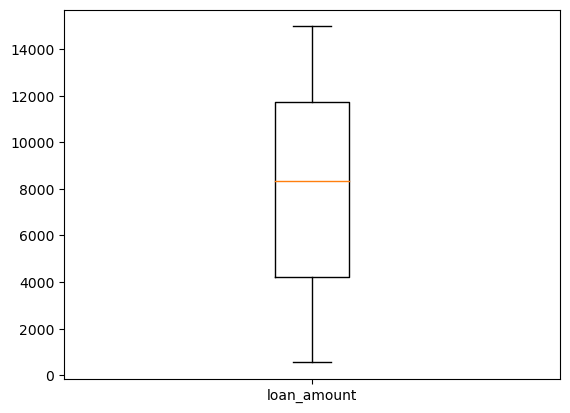

In [41]:
# To check for the presence of outliers, we plot Boxplot
plt.boxplot(df['loan_amount'], labels= ['loan_amount'])
plt.show()

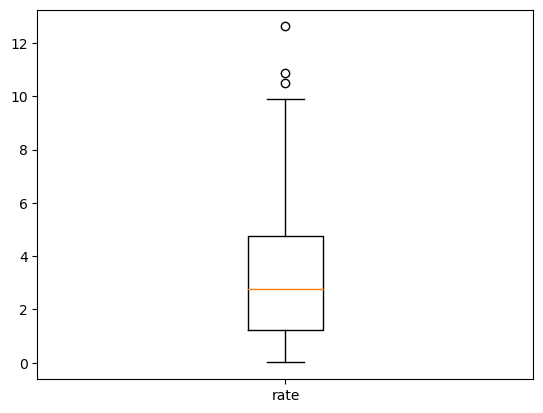

In [42]:
plt.boxplot(df['rate'], labels=['rate'])
plt.show()

In [43]:
# IQR Method to remove Outliers
q1 = np.percentile(df['rate'],25)
q3 = np.percentile(df['rate'],75)
iqr = q3 - q1
lower_limit = q1 - (1.5*iqr)
upper_limit = q3 + (1.5*iqr)

df1= df[(df.rate < upper_limit) & (df.rate > lower_limit)]
df1.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
client_id,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13


In [44]:
df1.shape

(440, 7)

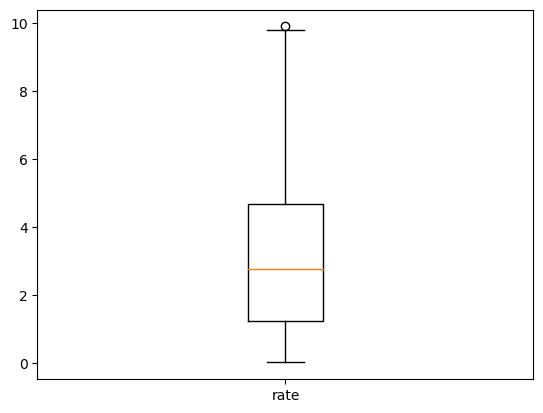

In [45]:
# Box Plot for rate --- based on IQR cleaned data 
plt.boxplot(df1['rate'], labels=['rate'])
plt.show()

In [46]:
# SQRT transformation
df1['sqrt_rate'] = df1['rate']**0.5
df1.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,sqrt_rate
client_id,,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,1.466288
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,1.118034
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,0.824621
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,1.113553
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,1.769181


In [47]:
# Standardization
Scaler = StandardScaler()
df1['rate'] = Scaler.fit_transform(df1[['rate']])
df1['loan_amount'] = Scaler.fit_transform(df1[['loan_amount']])
df1.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,sqrt_rate
client_id,,,,,,,,
46109,home,1.359338,0,10243,2002-04-16,2003-12-20,-0.438905,1.466288
46109,credit,0.430405,0,10984,2003-10-21,2005-07-17,-0.829306,1.118034
46109,home,1.134650,1,10990,2006-02-01,2007-07-05,-1.076560,0.824621
46109,cash,1.082909,1,10596,2010-12-08,2013-05-05,-0.833644,1.113553
46109,credit,1.449644,1,11415,2010-07-07,2012-05-21,-0.013802,1.769181


In [48]:
# Label Encoding
le = LabelEncoder()
df1['loan_type'] = le.fit_transform(df1['loan_type'])
df1.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,sqrt_rate
client_id,,,,,,,,
46109,2,1.359338,0,10243,2002-04-16,2003-12-20,-0.438905,1.466288
46109,1,0.430405,0,10984,2003-10-21,2005-07-17,-0.829306,1.118034
46109,2,1.134650,1,10990,2006-02-01,2007-07-05,-1.076560,0.824621
46109,0,1.082909,1,10596,2010-12-08,2013-05-05,-0.833644,1.113553
46109,1,1.449644,1,11415,2010-07-07,2012-05-21,-0.013802,1.769181


In [49]:
df1.dtypes

loan_type               int32
loan_amount           float64
repaid                  int64
loan_id                 int64
loan_start     datetime64[ns]
loan_end       datetime64[ns]
rate                  float64
sqrt_rate             float64
dtype: object

In [50]:
# Creating new Features
# We can use the loan_start and loan_end features to calculate the day of the loan
df1['loan_day'] = df1['loan_end'] - df1['loan_start']
df1.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,sqrt_rate,loan_day
client_id,,,,,,,,,
46109,2,1.359338,0,10243,2002-04-16,2003-12-20,-0.438905,1.466288,613 days
46109,1,0.430405,0,10984,2003-10-21,2005-07-17,-0.829306,1.118034,635 days
46109,2,1.134650,1,10990,2006-02-01,2007-07-05,-1.076560,0.824621,519 days
46109,0,1.082909,1,10596,2010-12-08,2013-05-05,-0.833644,1.113553,879 days
46109,1,1.449644,1,11415,2010-07-07,2012-05-21,-0.013802,1.769181,684 days


In [51]:
df1.dtypes

loan_type                int32
loan_amount            float64
repaid                   int64
loan_id                  int64
loan_start      datetime64[ns]
loan_end        datetime64[ns]
rate                   float64
sqrt_rate              float64
loan_day       timedelta64[ns]
dtype: object

In [52]:
# The number of days in the day are currently in TimeDelta, we convert it to integer
df1['loan_day'] = df1['loan_day'].dt.days
df1['loan_day'] = df1['loan_day']/365
df1.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,sqrt_rate,loan_day
client_id,,,,,,,,,
46109,2,1.359338,0,10243,2002-04-16,2003-12-20,-0.438905,1.466288,1.679452
46109,1,0.430405,0,10984,2003-10-21,2005-07-17,-0.829306,1.118034,1.739726
46109,2,1.134650,1,10990,2006-02-01,2007-07-05,-1.076560,0.824621,1.421918
46109,0,1.082909,1,10596,2010-12-08,2013-05-05,-0.833644,1.113553,2.408219
46109,1,1.449644,1,11415,2010-07-07,2012-05-21,-0.013802,1.769181,1.873973


In [53]:
# Training and Testing data
y = df1['loan_amount']
X = df1[['loan_type','repaid','loan_id','rate','sqrt_rate','loan_day']]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state =42)

print("The shape of X_train is:", X_train.shape)
print("The shape of X_test is:", X_test.shape)

print('\n')
print("The shape of y_train is:", y_train.shape)
print("The shape of y_test is:", y_test.shape)

The shape of X_train is: (352, 6)
The shape of X_test is: (88, 6)


The shape of y_train is: (352,)
The shape of y_test is: (88,)


In [54]:
# single linear regression

X = df1[['rate']]
y = df1[['loan_amount']]

# split dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# create regression model
model = LinearRegression()

# trainig the model
model.fit(X_train, y_train)

# using the model to predict the test data
y_pred = model.predict(X_test)
 
#calculating the R_squared score    
r2 = r2_score(y_test, y_pred)

#show result
print(f"R_Squared: {r2}")

R_Squared: -0.036236902508041124


In [55]:
# multi variable linear regression

X = df1[['rate', 'loan_day']]
y = df1[['loan_amount']]

# split dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# create regression model
model = LinearRegression()

# trainig the model
model.fit(X_train, y_train)

# using the model to predict the test data
y_pred = model.predict(X_test)
 
#calculating the R_squared score 
r2 = r2_score(y_test, y_pred)

#show result
print(f"R_Squared: {r2}")

R_Squared: -0.03438202511883648


In [56]:
# polynomial regression

X = df1[['loan_type','repaid','loan_id','rate','sqrt_rate','loan_day']]
y = df1[['loan_amount']]

# split dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# create regression model
model = LinearRegression()
pf = PolynomialFeatures(degree=2)
X_train_poly = pf.fit_transform(X_train)
X_test_poly = pf.fit_transform(X_test)

# trainig the model
model.fit(X_train_poly, y_train)
 
#calculating the R_squared score 
model.score(X_test_poly, y_test)

-0.09238331887204732

In [57]:
# polynomial regression

X = df1[['loan_type','repaid','rate','sqrt_rate','loan_day']]
y = df1[['loan_amount']]

# split dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# create regression model
model = LinearRegression()
pf = PolynomialFeatures(degree=3)
X_train_poly = pf.fit_transform(X_train)
X_test_poly = pf.fit_transform(X_test)

# trainig the model
model.fit(X_train_poly, y_train)
 
#calculating the R_squared score 
model.score(X_test_poly, y_test)

-0.26492902184092926